In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.4 MB/s eta 0:00:00


In [2]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
from datetime import datetime

In [4]:
# Load your dataset into a Pandas dataframe
df = pd.read_csv("/content/last_full-7030.csv")

In [ ]:
df = pd.read_csv("/content/last200 (1).csv")

In [5]:
#@title yeni feature eklemece
epsilon = 1e-8  # Small constant

df["followers_friends_ratio_float"] = df['followers_count']/(df['friends_count'] + epsilon)
#df = df.drop('friends_count',axis=1)
df

,Unnamed: 0,user_location,followers_count,statuses_count,verified,description,link_url,listed_count,created_at,favourites_count,...,followers_friends_ratio,tweet_freq,tweet_content,sentiment,name_numeric,statuses_count_per_day,historic_follower,historic_friend,percentage,followers_friends_ratio_float
0,0,0,1921,5943,False,0.5487,0,0,1.675355,7969,...,0,0,1,0.197994,8,0.304675,0.098483,0.118374,1,0.831962
1,1,0,630,9426,False,0.5487,0,0,1.678762,5320,...,0,0,1,0.210066,9,0.483236,0.032298,0.036604,1,0.882353
2,2,1,2198,3355,False,0.3040,0,0,1.679074,6608,...,0,0,1,0.208042,10,0.171998,0.112683,0.180611,1,0.623900
3,3,0,223,3617,False,0.5487,0,0,1.675434,2662,...,0,0,1,0.168461,0,0.185430,0.011432,0.006972,1,1.639706
4,4,0,1815,4129,False,0.4011,0,0,1.674306,10980,...,0,0,1,0.218361,4,0.211678,0.093048,0.132677,1,0.701314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45265,45265,1,897,25619,False,0.1630,0,0,1.584974,37659,...,0,0,0,0.217488,0,1.313391,0.045986,0.049985,0,0.920000
45266,45266,1,814,37432,False,0.5487,0,2,1.422553,52912,...,0,0,0,0.182348,0,1.918999,0.041731,0.015739,0,2.651466
45267,45267,0,42,787,False,0.2994,0,0,1.629140,3478,...,0,0,0,0.337587,1,0.040347,0.002153,0.008972,0,0.240000
45268,45268,1,594,4795,False,0.1783,0,0,1.624079,83915,...,0,0,0,0.419164,3,0.245822,0.030452,0.021839,0,1.394366


In [ ]:
#@title küçük setle yapma // bende çok farkı yok
df = df.drop(df[df['listed_count'] == 13635].index)

In [6]:
y = df['percentage']
X = df.drop('percentage', axis=1)
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]

In [ ]:
#@title nan var mı bakmaca
# Assuming your dataset is stored in a DataFrame called 'df'
# Check for NaN values
nan_values = X.isna().any()

# Get the column names with NaN values
columns_with_nan = nan_values[nan_values].index.tolist()

# Get the rows with NaN values
rows_with_nan = X[X.isna().any(axis=1)]

# Print the column names with NaN values
print("Columns with NaN values:", columns_with_nan)

# Print the rows with NaN values
print("Rows with NaN values:")
print(rows_with_nan)


Columns with NaN values: []
Rows with NaN values:
Empty DataFrame
Columns: [user_location, followers_count, statuses_count, verified, description, link_url, listed_count, created_at, favourites_count, profile_image, followers_friends_ratio, tweet_freq, tweet_content, sentiment, name_numeric, statuses_count_per_day, historic_follower, historic_friend, test_ratio]
Index: []


In [ ]:
#@title nan varsa doldur 0la
df_filled = X.fillna(0)

In [ ]:
#@title inf olanları gösteriyo
import numpy as np

# Check for infinity values
#print(np.isinf(df_filled).sum())

# Filter the dataset based on the infinite indices
inf_rows = df[np.isinf(df).any(axis=1)]

# Print the dataset for the infinite rows
inf_rows

,user_location,followers_count,statuses_count,verified,description,link_url,listed_count,created_at,favourites_count,profile_image,followers_friends_ratio,tweet_freq,tweet_content,sentiment,percentage,name_numeric,statuses_count_per_day,historic_follower,historic_friend,test_ratio


In [ ]:
print(df_filled.columns)

Index(['user_location', 'followers_count', 'statuses_count', 'verified',
       'description', 'link_url', 'listed_count', 'created_at',
       'favourites_count', 'profile_image', 'followers_friends_ratio',
       'tweet_freq', 'tweet_content', 'sentiment', 'name_numeric',
       'statuses_count_per_day', 'historic_follower', 'historic_friend',
       'test_ratio', 'percentage'],
      dtype='object')


In [7]:
#@title df_filled yaparsan X 'i df_filled ile değiştirirsin yoksa kalsın
Y = X


Y['percentage'] = y
#Y.drop([df.index[3348]], inplace=True)
y = Y['percentage']
Y = Y.drop('percentage',axis = 1)

print(y.value_counts())
print(Y.columns)
#print(X.columns)

0    31689
1    13581
Name: percentage, dtype: int64
Index(['user_location', 'followers_count', 'statuses_count', 'verified',
       'description', 'link_url', 'listed_count', 'created_at',
       'favourites_count', 'friends_count', 'profile_image',
       'followers_friends_ratio', 'tweet_freq', 'tweet_content', 'sentiment',
       'name_numeric', 'statuses_count_per_day', 'historic_follower',
       'historic_friend', 'followers_friends_ratio_float'],
      dtype='object')


In [ ]:
#@title küçük setle deneme
predictions = best_model.predict(Y)

correct_predictions = sum(predictions == y)
accuracy = correct_predictions / len(y)

cm = confusion_matrix(y, predictions)

print("Confusion Matrix:")
print(cm)
print(accuracy)
print(correct_predictions)

Confusion Matrix:
[[ 82  18]
 [  0 100]]
0.91
182


In [ ]:
#@title grid search - çalıştırmaya şimdilik gerek yok
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.3, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier()

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='recall', cv=skf)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Access the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions using the best model
y_pred = grid_search.predict(X_test)
print("Best parameters:", best_params)
print("Best score:", best_score)

# Calculate the recall score using the predictions from the best model
recall = recall_score(y_test, y_pred)
print("Recall score:", recall)


In [8]:
#@title class weight ve train teste bölme
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

class_weights = {0: 1, 1: 2}
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.3, random_state=42,shuffle=True)



In [9]:
# Create a Random Forest classifier object with the known best hyperparameters
best_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=200,min_samples_leaf=1,class_weight=class_weights)

# Fit the classifier on the training data
best_model.fit(X_train, y_train)

feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Make predictions using the trained model
y_pred = best_model.predict(X_test)

# Calculate the recall score using the predictions
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1score)


Accuracy:  0.9852735439216552
Recall:  0.9783718104495748
Precision:  0.9731689630166788
F1 Score:  0.9757634512845371


In [10]:
display(importance_df)

,Feature,Importance
13,tweet_content,0.489424
4,description,0.097322
7,created_at,0.086826
19,followers_friends_ratio_float,0.079670
14,sentiment,0.071385
15,name_numeric,0.039404
18,historic_friend,0.018357
9,friends_count,0.018214
0,user_location,0.015550
1,followers_count,0.014263


In [ ]:
#@title train vs test comparison
from sklearn.metrics import classification_report

# Predict the labels for the training set
y_train_pred = best_model.predict(X_train)

# Predict the labels for the test set
y_test_pred = best_model.predict(X_test)

# Calculate the classification report for the training set
train_report = classification_report(y_train, y_train_pred)

# Calculate the classification report for the test set
test_report = classification_report(y_test, y_test_pred)

print("Training Set Metrics:")
print(train_report)

print("Test Set Metrics:")
print(test_report)


Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22223
           1       0.99      0.99      0.99      9466

    accuracy                           0.99     31689
   macro avg       0.99      0.99      0.99     31689
weighted avg       0.99      0.99      0.99     31689

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9466
           1       0.97      0.98      0.98      4115

    accuracy                           0.98     13581
   macro avg       0.98      0.98      0.98     13581
weighted avg       0.98      0.98      0.98     13581



In [ ]:
print(train_report)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22223
           1       0.99      0.99      0.99      9466

    accuracy                           0.99     31689
   macro avg       0.99      0.99      0.99     31689
weighted avg       0.99      0.99      0.99     31689



# graphs for models

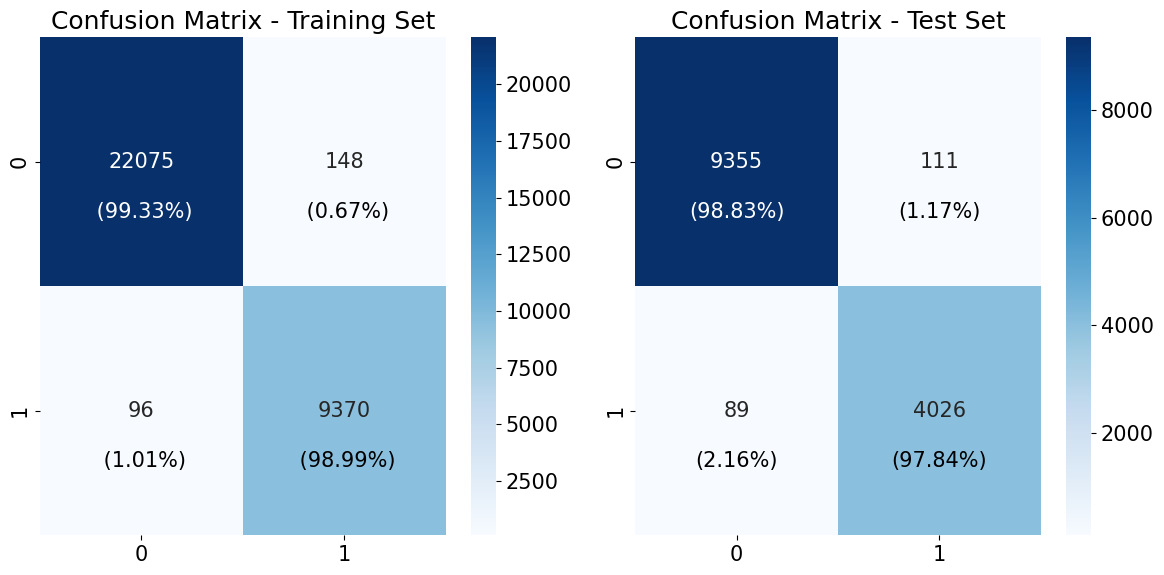

In [26]:
#@title Confusion matrix both for train and test
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 15})
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training set
y_train_pred = best_model.predict(X_train)
# Compute the confusion matrix for the training set
train_cm = confusion_matrix(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
# Compute the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Calculate the percentages for the confusion matrix
train_cm_percent = train_cm / train_cm.sum(axis=1)[:, np.newaxis]
test_cm_percent = test_cm / test_cm.sum(axis=1)[:, np.newaxis]

# Create subplots for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for the training set
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
for i in range(train_cm.shape[0]):
    for j in range(train_cm.shape[1]):
        color = 'white' if i == 0 and j == 0 else 'black'
        axes[0].text(j + 0.5, i + 0.7, f' ({train_cm_percent[i, j]:.2%})', ha='center', va='center',color=color)

# Plot the confusion matrix for the test set
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
for i in range(test_cm.shape[0]):
    for j in range(test_cm.shape[1]):
        color = 'white' if i == 0 and j == 0 else 'black'
        axes[1].text(j + 0.5, i + 0.7, f'({test_cm_percent[i, j]:.2%})', ha='center', va='center', color=color)

plt.tight_layout()
plt.show()




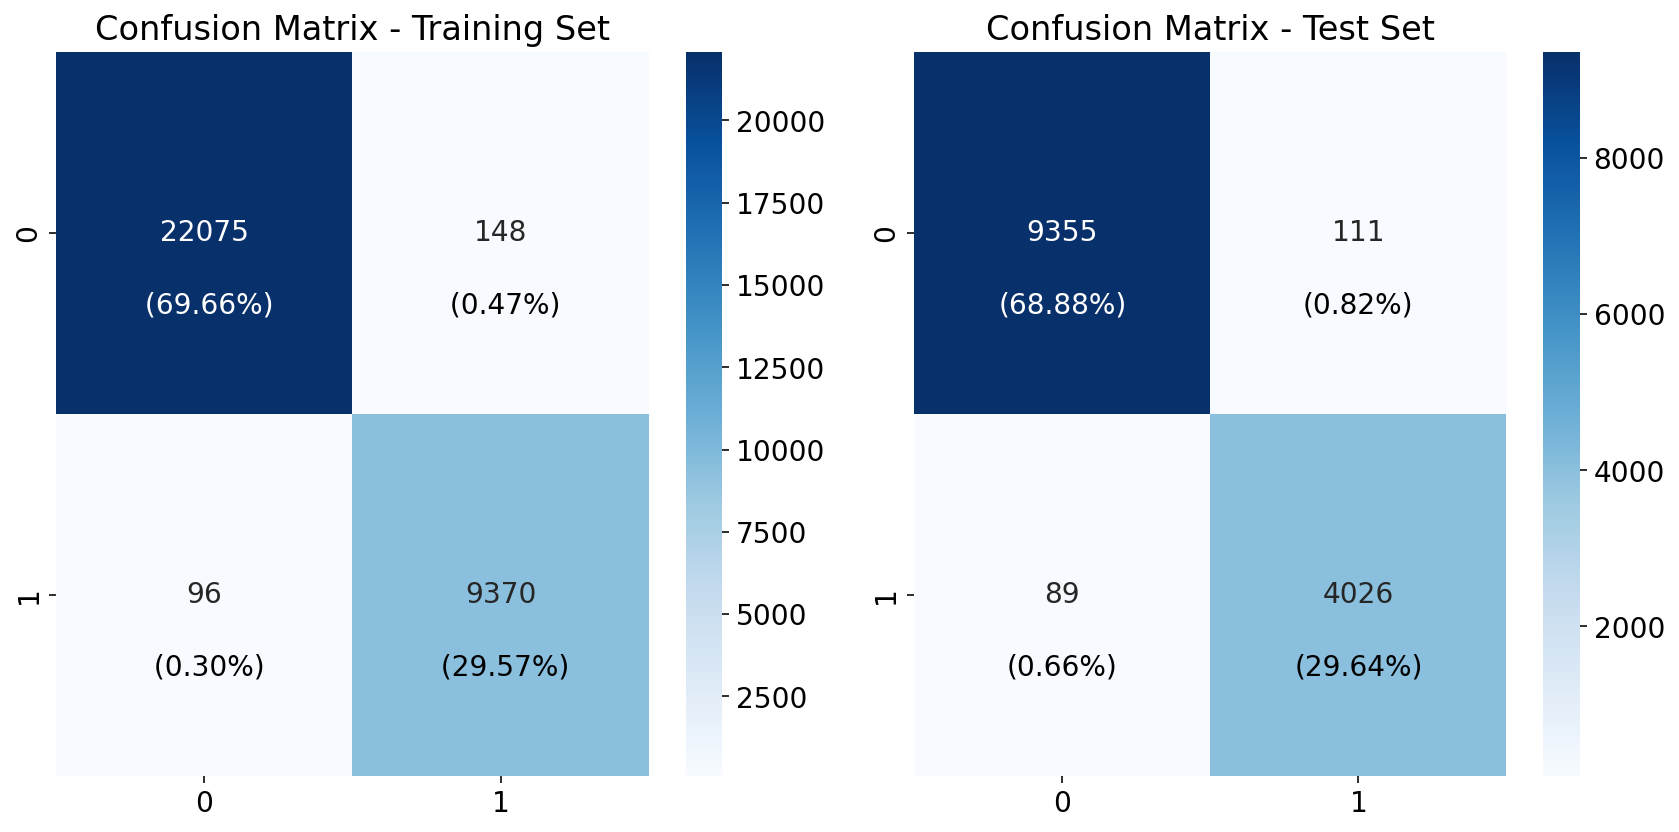

In [60]:
plt.rcParams['figure.dpi'] = 144
plt.rcParams.update({'font.size': 14})
# Make predictions on the training set
y_train_pred = best_model.predict(X_train)
# Compute the confusion matrix for the training set
train_cm = confusion_matrix(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
# Compute the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Calculate the percentages for the confusion matrix
train_cm_percent = train_cm / train_cm.sum(axis=1)[:, np.newaxis]
test_cm_percent = test_cm / test_cm.sum(axis=1)[:, np.newaxis]

# Create subplots for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Calculate the percentages for the training set
# Calculate the percentages for the training set
train_cm_percent = (train_cm / train_cm.sum()) * 100

# Plot the confusion matrix for the training set
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
for i in range(train_cm.shape[0]):
    for j in range(train_cm.shape[1]):
        color = 'white' if i == 0 and j == 0 else 'black'
        percent = f'{train_cm_percent[i, j]:.2f}'
        axes[0].text(j + 0.5, i + 0.7, f' ({percent}%)', ha='center', va='center', color=color)

# Calculate the percentages for the test set
test_cm_percent = (test_cm / test_cm.sum()) * 100

# Plot the confusion matrix for the test set
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
for i in range(test_cm.shape[0]):
    for j in range(test_cm.shape[1]):
        color = 'white' if i == 0 and j == 0 else 'black'
        percent = f'{test_cm_percent[i, j]:.2f}'
        axes[1].text(j + 0.5, i + 0.7, f'({percent}%)', ha='center', va='center', color=color)

plt.tight_layout()
plt.show()


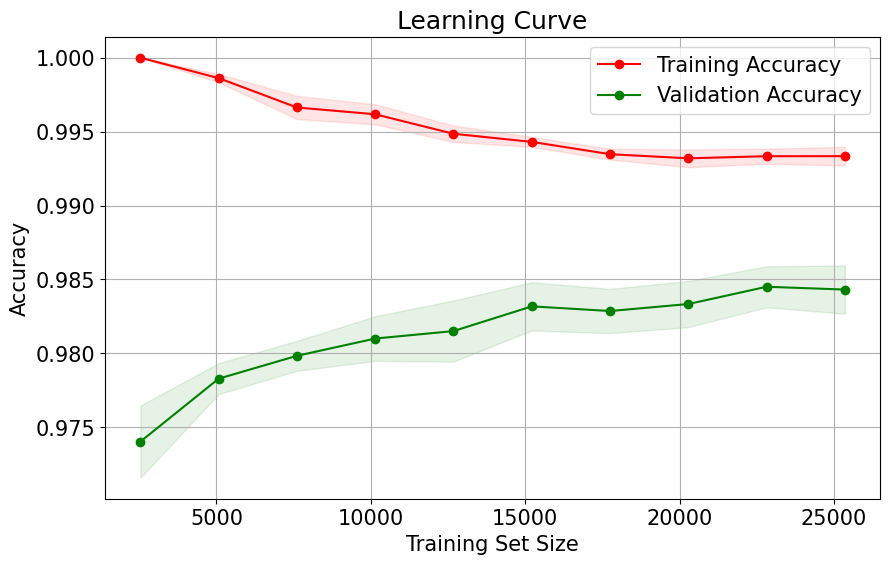

In [29]:
#@title Learning Curve
from sklearn.model_selection import learning_curve
# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(1, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()



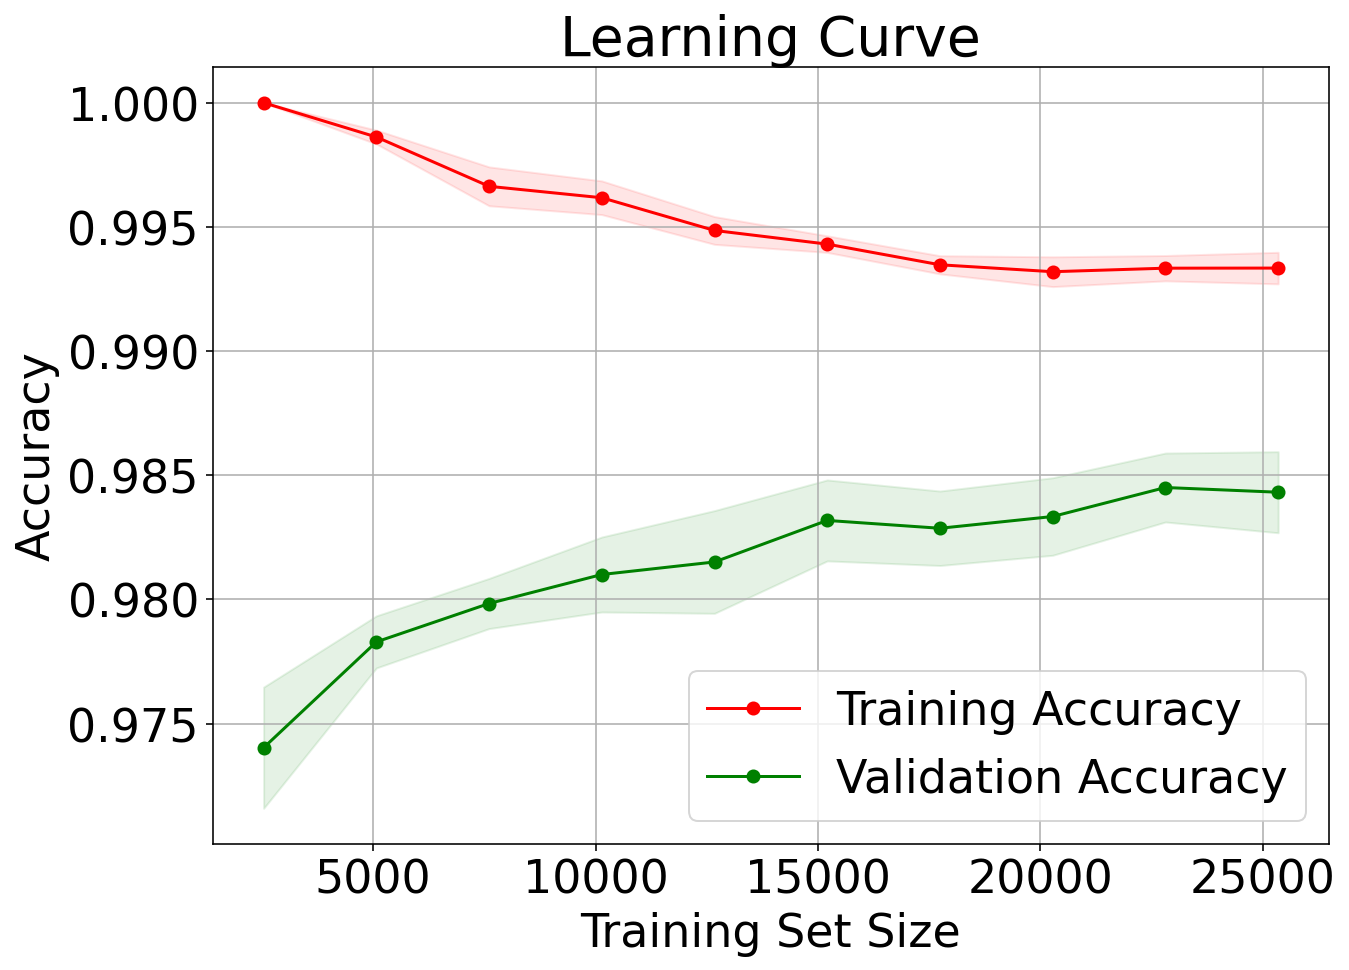

In [51]:
# Plot the learning curve
plt.rcParams['figure.dpi'] = 144
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


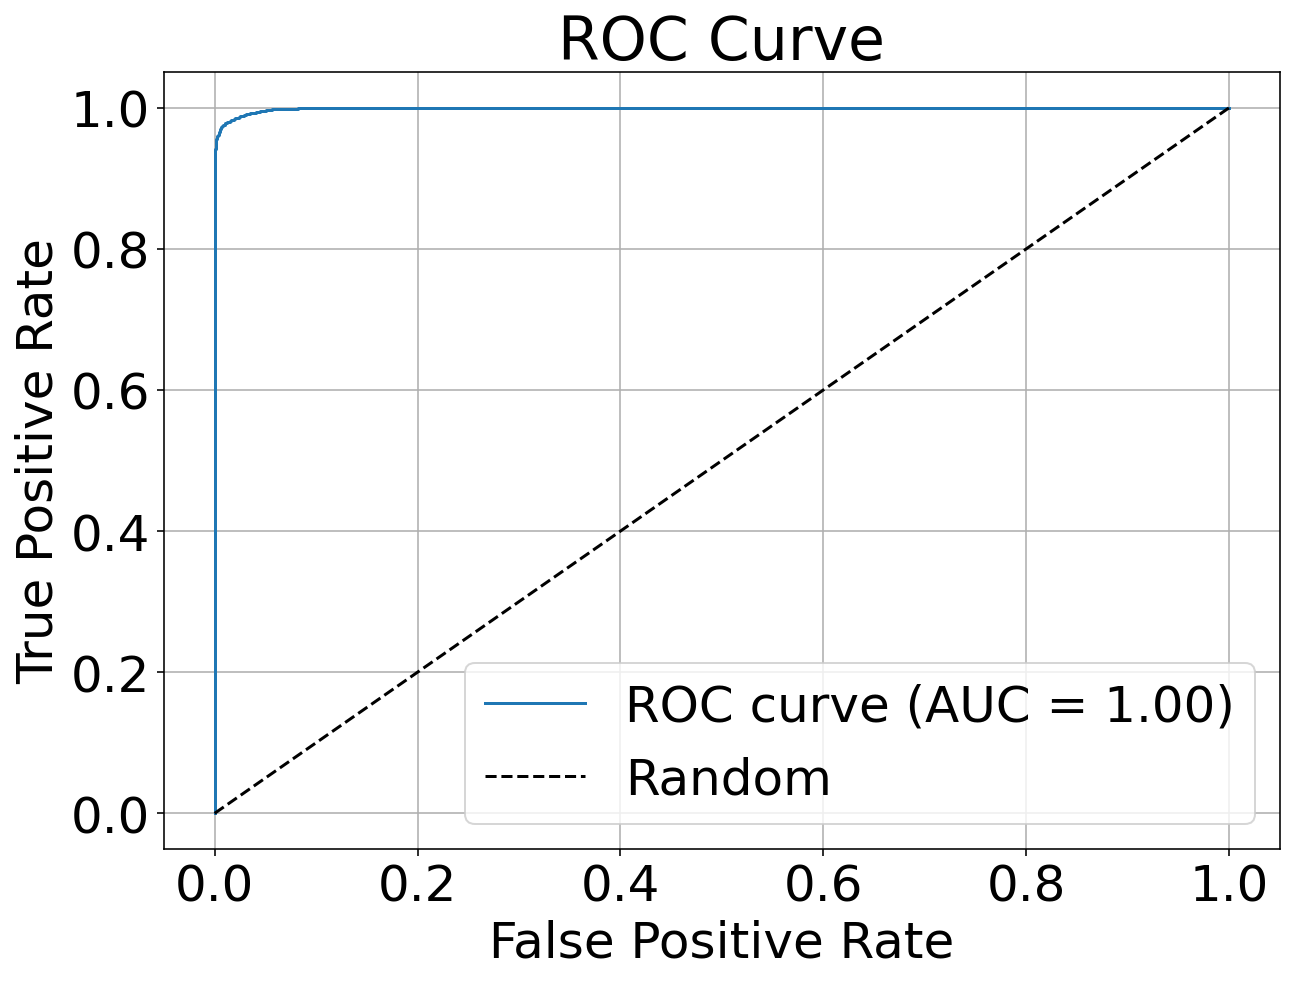

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the predicted probabilities for the positive class
# y_proba should be an array of shape (n_samples,)
# where each value represents the predicted probability of the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.rcParams['figure.dpi'] = 144
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Set the x-axis and y-axis limits
#plt.xlim([0, 0.2])
#plt.ylim([0.8, 1])
plt.rcParams.update({'font.size': 25})
# Add gridlines
plt.grid(True)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


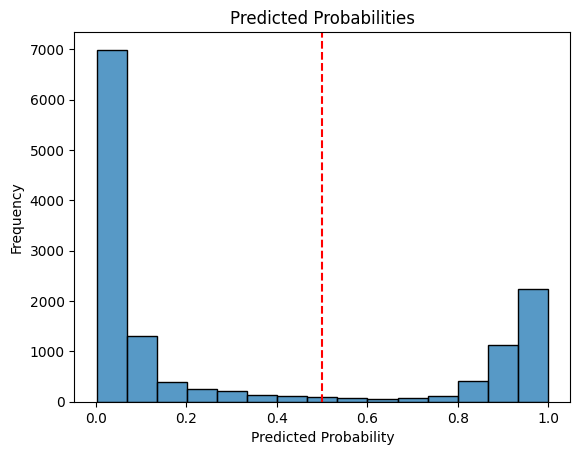

In [ ]:
#@title Plot the bar plot of predicted probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]
sns.histplot(y_proba, kde=False)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probabilities')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


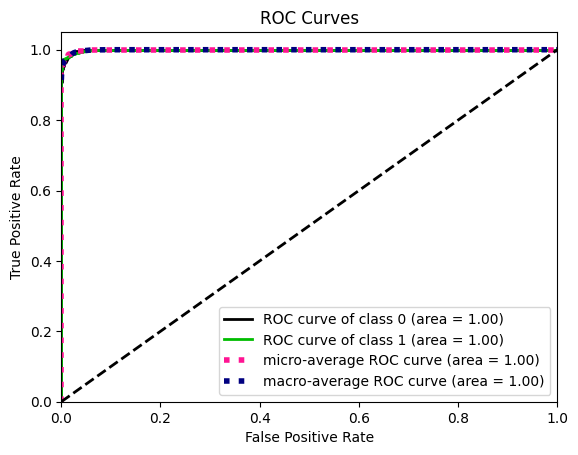

<Figure size 1000x600 with 0 Axes>

In [ ]:
import scikitplot as skplt


y_probas = best_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.figure(figsize=(10,6))
plt.show()